<a href="https://colab.research.google.com/github/mr91195/Progetto/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot
import matplotlib.dates

In [ ]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)

In [ ]:
meteo.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
meteo.isna().sum().sum()

1302253

In [ ]:
print ( 'dimensione dataset iniziale: ' + str(meteo.shape) )


meteo = meteo.dropna()
meteo.isna().sum().sum()

print ( 'dimensione dataset senza NaN: ' + str(meteo.shape) )


dimensione dataset iniziale: (237629, 13)
dimensione dataset senza NaN: (21799, 13)


In [ ]:
newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)
meteo.head()

,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010


In [ ]:
cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
meteo.head()

,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,Date
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,2010-01-01
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,2010-01-01
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,2010-01-01
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,2010-01-02
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,2010-01-02


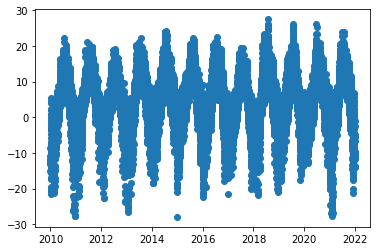

In [ ]:
meteo_air_temperatury = pd.DataFrame({'Date' : meteo['Date'] , 'Mean_Temp_Day' : meteo['mean_air_temp_perday']})

dates = meteo_air_temperatury['Date']
value = meteo_air_temperatury['Mean_Temp_Day']
dates = matplotlib.dates.date2num(dates)
matplotlib.pyplot.plot_date



#meteo_air_temperatury.plot(figsize=(22, 10), grid=True , xlabel="Date", ylabel="Mean_temp_day", title ="Air Temperatury per day", fontsize=14)




#sns.set(rc={"figure.figsize":(20, 10)})
#sns.lineplot(x='Date', y='Mean_Temp_Day', data=meteo_air_temperatury)

In [49]:
week = pd.PeriodIndex(meteo_air_temperatury['Date'] , freq='w').drop_duplicates()
txt = str(week[1]).split("/")
txt

type(meteo_air_temperatury['Date'])
type(txt[0])

txt1 = pd.to_datetime(txt[0])
txt2 = pd.to_datetime(txt[1])

tmp = meteo[meteo.Date.between(txt1, txt2)]
tmp

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
max :5.4
min :-21.5


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,Date
172,SN69100,63.4597,10.9305,0.4,94.0,12.0,-3.50,86.0,4.9,2.50,4,1,2010,2010-01-04
178,SN91380,69.3875,20.2823,-8.3,83.0,4.7,-14.90,76.0,2.7,0.00,4,1,2010,2010-01-04
179,SN91740,69.7887,20.9553,-8.2,87.0,2.5,-14.05,79.0,1.2,0.15,4,1,2010,2010-01-04
218,SN69100,63.4597,10.9305,-9.7,81.0,5.9,-14.25,77.0,4.2,0.00,5,1,2010,2010-01-05
224,SN91380,69.3875,20.2823,-19.1,86.0,2.7,-20.40,83.0,2.1,0.00,5,1,2010,2010-01-05
225,SN91740,69.7887,20.9553,-14.0,90.0,3.4,-17.10,83.0,1.0,0.00,5,1,2010,2010-01-05
264,SN69100,63.4597,10.9305,-21.0,81.0,5.2,-21.50,78.0,3.4,0.00,6,1,2010,2010-01-06
270,SN91380,69.3875,20.2823,-8.7,85.0,3.2,-17.45,75.0,2.1,0.25,6,1,2010,2010-01-06
271,SN91740,69.7887,20.9553,-8.8,70.0,8.8,-12.55,58.0,5.1,0.00,6,1,2010,2010-01-06
310,SN69100,63.4597,10.9305,-17.8,81.0,5.1,-20.65,79.0,3.5,0.00,7,1,2010,2010-01-07
